# Análise PIB per Capita
O PIB per capita representa a média de produção e riqueza de um país distribuída por cada habitante. Este índice é frequentemente empregado para avaliar o nível de vida e o desenvolvimento econômico das nações.

## Projeto
1. Informe o primeiro valor registrado de cada país.
2. Informe as regiões com maiores crescimentos de PIB per capita no século passado.
3. Preecha os anos ausentes em cada país com uma estimativa de dados para o PIB per capita.
4. Crie um mapa do PIB per capita no mundo ao longo dos anos.

**Libs e Configs**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## data loading

In [2]:
df = pd.read_csv('../datasets/gdp.csv')

## data exploration & preprocessing

**dataset**

In [2]:
df.head()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


In [3]:
df.shape

(4419, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [5]:
df.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

**Country**

In [19]:
df['Country'].head(3)

0    Afghanistan
1    Afghanistan
2    Afghanistan
Name: Country, dtype: object

In [7]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Djibouti', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran'

In [9]:
len(df['Country'].unique())

193

**Region**

In [20]:
df['Region'].head()

0    Middle East, North Africa, and Greater Arabia
1    Middle East, North Africa, and Greater Arabia
2    Middle East, North Africa, and Greater Arabia
3    Middle East, North Africa, and Greater Arabia
4    Middle East, North Africa, and Greater Arabia
Name: Region, dtype: object

In [16]:
df['Region'].unique()

array(['Middle East, North Africa, and Greater Arabia', 'Europe',
       'Sub-Saharan Africa', 'Central America and the Caribbean',
       'South America', 'Australia and Oceania', 'Asia', 'North America'],
      dtype=object)

**Year**

In [18]:
df['Year'].head(3)

0    1/1/1901
1    1/1/1906
2    1/1/1911
Name: Year, dtype: object

In [23]:
df['Year'].unique()

array(['1/1/1901', '1/1/1906', '1/1/1911', '1/1/1916', '1/1/1921',
       '1/1/1926', '1/1/1931', '1/1/1936', '1/1/1941', '1/1/1946',
       '1/1/1951', '1/1/1956', '1/1/1961', '1/1/1966', '1/1/1971',
       '1/1/1976', '1/1/1981', '1/1/1986', '1/1/1991', '1/1/1996',
       '1/1/2001', '1/1/2006', '1/1/2011'], dtype=object)

In [6]:
int(df['Year'][0].split('/')[-1])

1901

In [3]:
# transformar para int
df['Year'] = df['Year'].apply(lambda x: x.split('/')[-1]).astype(int)

In [33]:
df.head()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


In [35]:
df['Year'].isna().sum()

0

In [34]:
df[' GDP_pp '].head()

0     613.99 
1     624.04 
2     634.25 
3     647.28 
4     662.40 
Name:  GDP_pp , dtype: object

**GDP_pp**

In [41]:
df[' GDP_pp '].unique()

array([' 613.99 ', ' 624.04 ', ' 634.25 ', ..., ' 719.96 ', ' 520.17 ',
       ' 526.33 '], dtype=object)

In [46]:
df[' GDP_pp '][0]

' 613.99 '

In [45]:
df[' GDP_pp '].to_frame().value_counts()

 GDP_pp   
 3,372.76     4
 3,767.51     2
 1,315.52     2
 1,307.21     2
 1,503.87     2
             ..
 2,252.35     1
 2,254.52     1
 2,256.51     1
 2,256.63     1
 999.96       1
Name: count, Length: 4387, dtype: int64

In [48]:
df[' GDP_pp '][0].split()

['613.99']

In [51]:
df[df[' GDP_pp '] == ' 3,372.76 ']

,Country,Region,Year,GDP_pp
1993,"Korea, Dem. Rep.",Asia,1976,"3,372.76"
1994,"Korea, Dem. Rep.",Asia,1981,"3,372.76"
1995,"Korea, Dem. Rep.",Asia,1986,"3,372.76"
1996,"Korea, Dem. Rep.",Asia,1991,"3,372.76"


In [4]:
# renomear campo gdp
df.rename(columns={' GDP_pp ': 'Gdp_pp'}, inplace=True) 

In [5]:
# remover ',' e converter em float
df['Gdp_pp'] = df['Gdp_pp'].apply(lambda x: x.split()[0].replace(',', '')).astype(float)

In [66]:
df['Gdp_pp'].isna().sum()

0

In [11]:
df.head()

,Country,Region,Year,Gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4419 non-null   object 
 1   Region   4419 non-null   object 
 2   Year     4419 non-null   int64  
 3   Gdp_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


In [69]:
df.describe()

,Year,Gdp_pp
count,4419.000000,4419.000000
mean,1956.027155,5551.033745
std,33.175278,9300.076227
min,1901.000000,285.150000
25%,1926.000000,1004.510000
50%,1956.000000,2201.460000
75%,1986.000000,5699.825000
max,2011.000000,118681.300000


## insight extraction

In [71]:
df.head()

,Country,Region,Year,Gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


### 1. Informe o ano do primeiro valor registrado de cada país.

In [90]:
# agrupamento de pais e dados do campo year
df.groupby('Country')['Year'].first()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [92]:
# um pais não existia em 1901

df.groupby('Country')['Year'].first().value_counts()

Year
1901    192
1991      1
Name: count, dtype: int64

In [126]:
df.groupby('Country')['Year'].first()[df.groupby('Country')['Year'].first() == 1991]

Country
Kosovo    1991
Name: Year, dtype: int64

### 2. Informe as regiões com maiores crescimentos percentuais de PIB per capita no século passado.

In [44]:
# sec xx: 1 de jan. de 1901 – 31 de dez. de 2000'

# inicio do seculo
df.query('Year == 1901').groupby('Region')['Gdp_pp'].mean()

Region
Asia                                              900.756296
Australia and Oceania                            1492.222000
Central America and the Caribbean                1460.596842
Europe                                           2583.788478
Middle East, North Africa, and Greater Arabia    1164.350000
North America                                    3676.015000
South America                                    1638.665833
Sub-Saharan Africa                                650.119783
Name: Gdp_pp, dtype: float64

In [45]:
# fim do seculo
df.query('Year == 2000').groupby('Region')['Gdp_pp'].mean()

Series([], Name: Gdp_pp, dtype: float64)

In [46]:
df.query('Year <= 2000')['Year'].max()

1996

In [52]:
# crescimentos medios percentuais no seculo XX
(
    (
        df.query('Year == 1996').groupby('Region')['Gdp_pp'].mean() /
        df.query('Year == 1901').groupby('Region')['Gdp_pp'].mean() -1
    ) 
    
).sort_values(ascending=False)*100

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: Gdp_pp, dtype: float64

### 3. Preecha os anos ausentes em cada país com uma estimativa de dados para o PIB per capita.

In [249]:
# anos que estão no dataset
df['Year'].unique()

array([1901, 1906, 1911, 1916, 1921, 1926, 1931, 1936, 1941, 1946, 1951,
       1956, 1961, 1966, 1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006,
       2011])

In [251]:
# range com todos anos esperados
np.arange (df['Year'].min(), df['Year'].max()+1)

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011])

In [262]:
# anos que deverão ser incluídos
np.array([x for x in list(range(1901,2012)) if x not in df['Year'].unique()])

array([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
       1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
       1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
       1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
       1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
       1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
       1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
       1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010])

In [7]:
# inserir anos ausentes em novo dataframe

years = list(range(1901, 2012))
countries = df['Country'].unique()

multiIndex = pd.MultiIndex.from_product(  # indexacao
    [countries, years],
    names=['Country', 'Year']
)

df_multiIndex = pd.DataFrame(index=multiIndex).reset_index()  # df para merge

pib = pd.merge(df_multiIndex, df, on=['Country', 'Year'], how='left')  # merge

pib


,Country,Year,Region,Gdp_pp
0,Afghanistan,1901,"Middle East, North Africa, and Greater Arabia",613.99
1,Afghanistan,1902,NaN,NaN
2,Afghanistan,1903,NaN,NaN
3,Afghanistan,1904,NaN,NaN
4,Afghanistan,1905,NaN,NaN
...,...,...,...,...
21418,Zimbabwe,2007,NaN,NaN
21419,Zimbabwe,2008,NaN,NaN
21420,Zimbabwe,2009,NaN,NaN
21421,Zimbabwe,2010,NaN,NaN


In [8]:
# interpolando dados da renda per capita 
pib['Gdp_pp'] = pib.groupby('Country')['Gdp_pp'].transform(
    lambda x: x.interpolate(method='linear'))

# mapeando regioes aos novos registros
regioes = df.groupby('Country')['Region'].unique().to_dict()

pib['Region'] = pib['Country'].map(regioes)
pib['Region'] = pib['Region'].apply(
    lambda x: str(x).replace('[', '').replace(']', '').strip("''"))

In [9]:
# dataframe final com dados estimatimados dos anos ausentes
pib

,Country,Year,Region,Gdp_pp
0,Afghanistan,1901,"Middle East, North Africa, and Greater Arabia",613.990
1,Afghanistan,1902,"Middle East, North Africa, and Greater Arabia",616.000
2,Afghanistan,1903,"Middle East, North Africa, and Greater Arabia",618.010
3,Afghanistan,1904,"Middle East, North Africa, and Greater Arabia",620.020
4,Afghanistan,1905,"Middle East, North Africa, and Greater Arabia",622.030
...,...,...,...,...
21418,Zimbabwe,2007,Sub-Saharan Africa,521.402
21419,Zimbabwe,2008,Sub-Saharan Africa,522.634
21420,Zimbabwe,2009,Sub-Saharan Africa,523.866
21421,Zimbabwe,2010,Sub-Saharan Africa,525.098


## dataviz

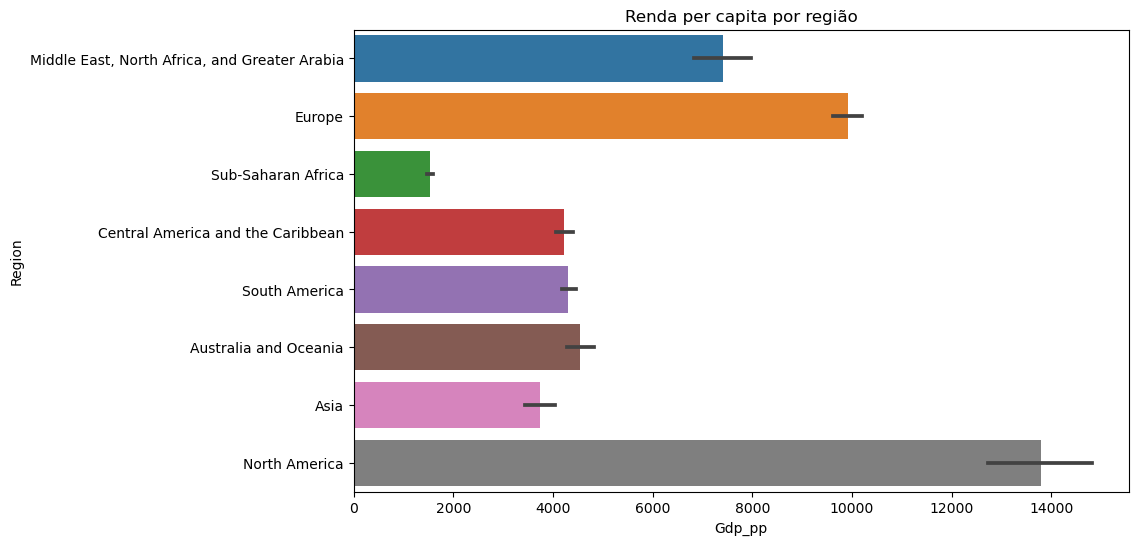

In [336]:
# renda por regiao
plt.figure(figsize=(10, 6))
sns.barplot(y='Region', x='Gdp_pp', data=pib)
plt.title('Renda per capita por região')
plt.show()

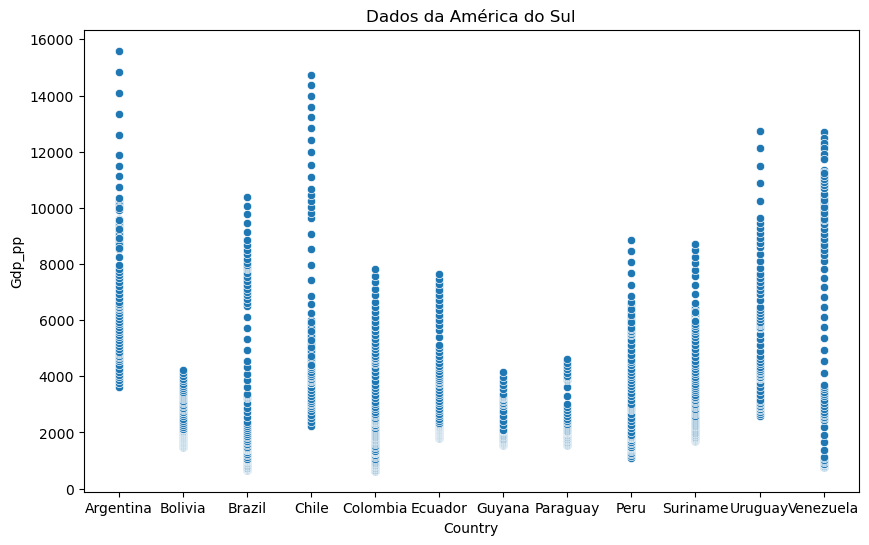

In [10]:
# south america
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pib.query('Region == "South America"'),
    x='Country',
    y='Gdp_pp'
)
plt.title('Dados da América do Sul')
plt.show()

/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


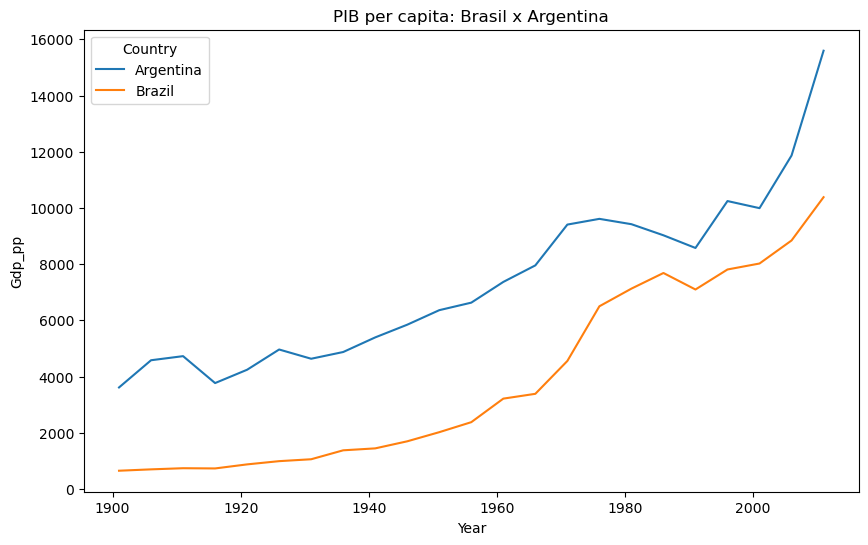

In [11]:
# brasil x argentina
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pib.query('(Country == "Brazil") or (Country == "Argentina")'),
    y='Gdp_pp',
    x='Year',
    hue='Country'
)
plt.title('PIB per capita: Brasil x Argentina')
plt.show()

/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/escova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


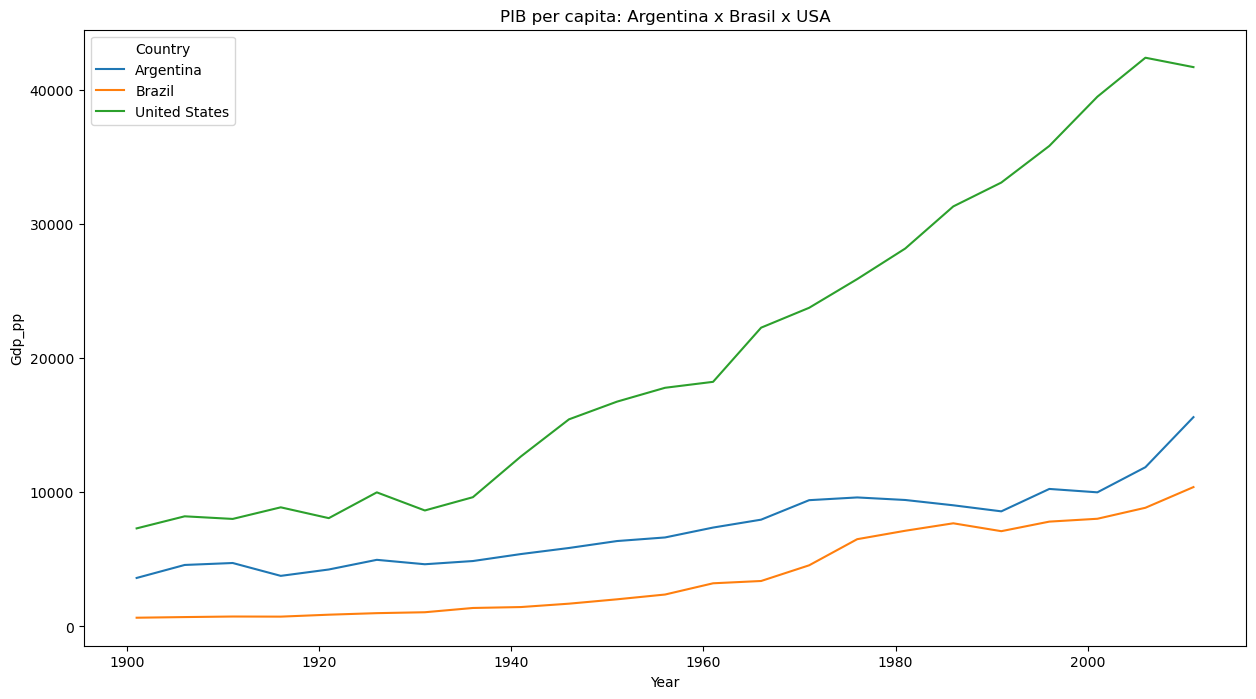

In [12]:
# br x arg x usa
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=pib.query('Country == "Argentina" or Country =="United States" or Country=="Brazil"'),
    x='Year',
    y='Gdp_pp',
    hue='Country'
)
plt.title('PIB per capita: Argentina x Brasil x USA')
plt.show()

### 4. Crie um mapa do PIB per capita no mundo ao longo dos anos.

In [25]:
dados_iso_alpha = px.data.gapminder()  # carregar dados do plotly com iso e alpha

dict_iso_alpha = dados_iso_alpha.set_index("country").to_dict()["iso_alpha"]  # mapear pais com iso e alpha

dict_num = {j: i for i, j in enumerate(pib["Country"].unique())}  # mapeando por valores unicos

# add campos
pib["iso_alpha"] = pib["Country"].map(dict_iso_alpha)
pib["iso_num"] = pib["Country"].map(dict_num)

In [26]:
pib.head()

,Country,Year,Region,Gdp_pp,iso_alpha,iso_num
0,Afghanistan,1901,"Middle East, North Africa, and Greater Arabia",613.99,AFG,0
1,Afghanistan,1902,"Middle East, North Africa, and Greater Arabia",616.00,AFG,0
2,Afghanistan,1903,"Middle East, North Africa, and Greater Arabia",618.01,AFG,0
3,Afghanistan,1904,"Middle East, North Africa, and Greater Arabia",620.02,AFG,0
4,Afghanistan,1905,"Middle East, North Africa, and Greater Arabia",622.03,AFG,0


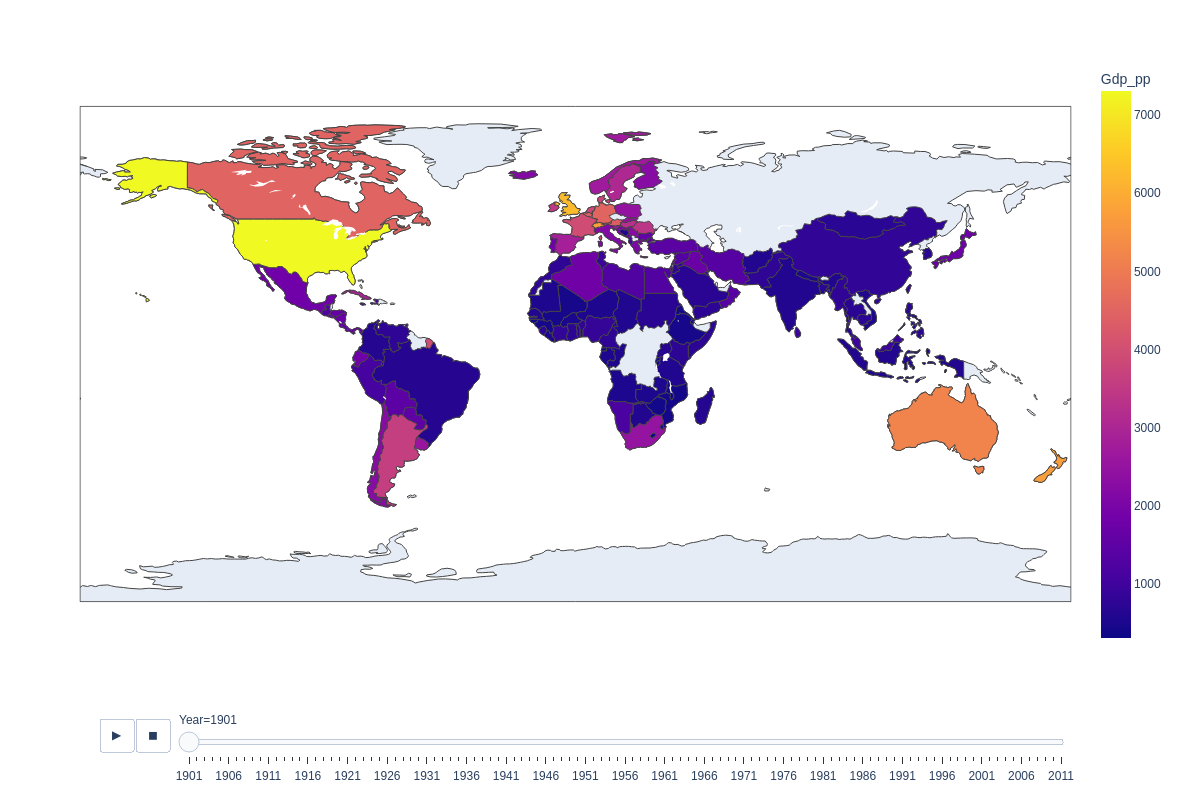

In [27]:
# mapa mundial

fig = px.choropleth(
    pib,
    locations="iso_alpha",
    color="Gdp_pp",
    hover_name="Country",
    animation_frame="Year"
)

fig.update_layout(height=800)
fig.show()